# Lab Segmentation 2

In [7]:
from commonfunctions import *
import skimage.io as io
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
def getThreshold(img):
    newImg = np.copy(img)
    newImg = newImg*255
    newImg = newImg.astype('uint8')
    imgHist = np.histogram(newImg, bins=256)
    imgHist = imgHist[0]
    H_c = np.zeros((256))
    # T = np.zeros((256))
    imgSize = newImg.shape[0] * newImg.shape[1]

    # Tinit = 𝑟𝑜𝑢𝑛𝑑((Σ𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 ∗ 𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑃𝑖𝑥𝑒𝑙𝑠𝑘) / 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑖𝑥𝑒𝑙𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑖𝑚𝑎𝑔𝑒. )
    
    H_c[0] = imgHist[0]
    H_c[255] = imgSize
    for p in range(1,imgHist.shape[0]-1):
        H_c[p] = H_c[p-1] + imgHist[p]
        # T[p] = round((255)*H_c[p]/imgSize)
    TinitPrev = -1
    while True:
        sum = 0
        for i in range(imgHist.shape[0]):
            sum = sum + i * imgHist[i]
        Tinit = round(sum/H_c[-1])
        sum1=0
        sum2=0
        for i in range(Tinit):
            sum1 = sum1 + i * imgHist[i]
        H_c1 = H_c[0:Tinit] 
        Tinit1 = round(sum1/H_c1[-1])
        for i in range(Tinit,imgHist.shape[0]):
            sum2 = sum2 + i * imgHist[i]

        H_c2 = H_c[Tinit: 255] 
        Tinit2 = round(sum2/(H_c2[-1] - H_c1[-1]))
        Tinit = (Tinit1+Tinit2)/2
        if Tinit == TinitPrev:
            break
        TinitPrev = Tinit
    return Tinit    

TypeError: Invalid shape (26508,) for image data

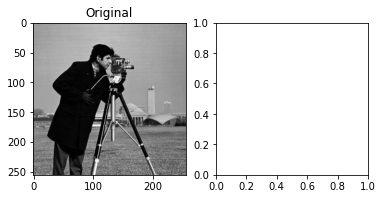

In [24]:
cameramanImg = io.imread("./cameraman.png")
T_cameramanImg =  getThreshold(cameramanImg)
newCameramanImg = cameramanImg[cameramanImg >= T_cameramanImg]
show_images([cameramanImg, newCameramanImg], ["Original", "After threshold"])